<a href="https://colab.research.google.com/github/Gingercapo/Fuel_Economy/blob/main/fuel_Economic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
# importing numpy libray
from numpy.ma.core import power
import numpy as np
import seaborn as sb
%matplotlib inline


In [17]:
# Read my data from a url 
df = pd.read_csv("/content/fuel-econ (2).csv")
df.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


# Scatter Plot
- A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

Example 1 b. Scatter plot showing negative correlation between two variables
- In this example, **the relationship between the two variables is negative** because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Text(0, 0.5, 'Combined Fuel efficieny (mpg)')

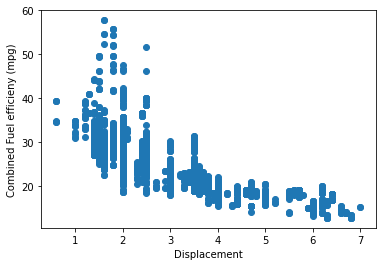

In [18]:
# Scatter plot for the data we want to plot
plt.scatter(data = df, x = "displ", y = "comb");
plt.xlabel("Displacement")
plt.ylabel("Combined Fuel efficieny (mpg)")

# Alternative Approach
## Using seaborn.regplot()
Seaborn's regplot() function combines scatterplot creation with regression function fitting:
Example 1 b. Scatter plot showing negative correlation between two variables
- In the example above, **the relationship between the two variables is negative** because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

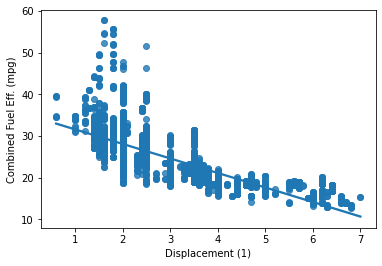

In [19]:
sb.regplot(data = df, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Plot the regression line on the transformed data
In this example, the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.

In [20]:
# Function that extract data and plot using log or power
def log_trans(x, inverse=False):
  if not inverse:
    return np.log10(x)
  else:
    return np.power(x,10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


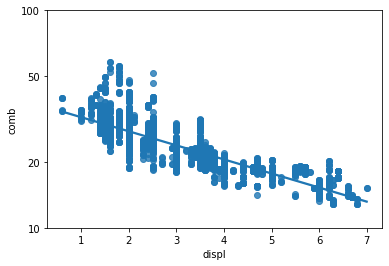

In [21]:
# using 
sb.regplot(df['displ'], df['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

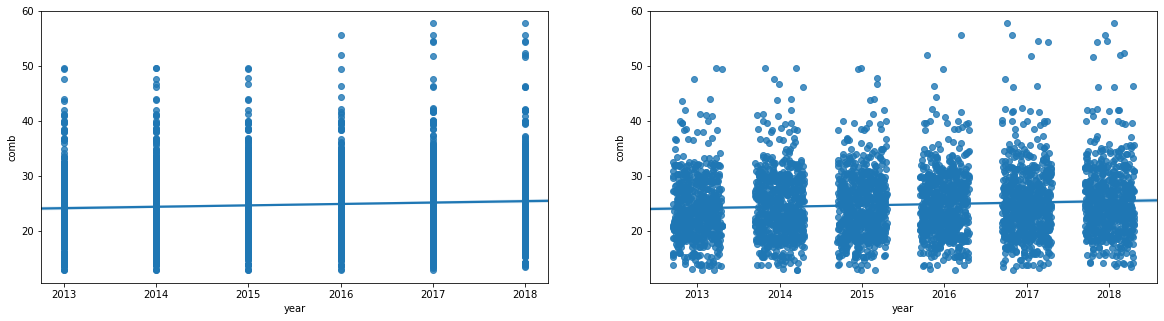

In [22]:
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)
# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = df, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

# Plot with both Jitter and Transparency
The scatter_kws helps specifying the opaqueness of the data points.

- In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.3 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter.


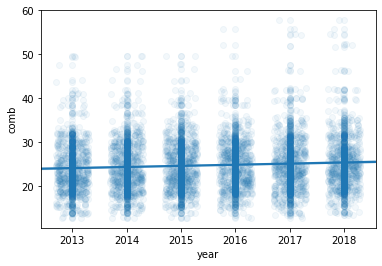

In [23]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = df, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = df, x = 'year', y = 'comb', alpha=1/20);

# A heat map
- A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. 
- Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. 
- Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. 
- Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's 'hist2d()' function.



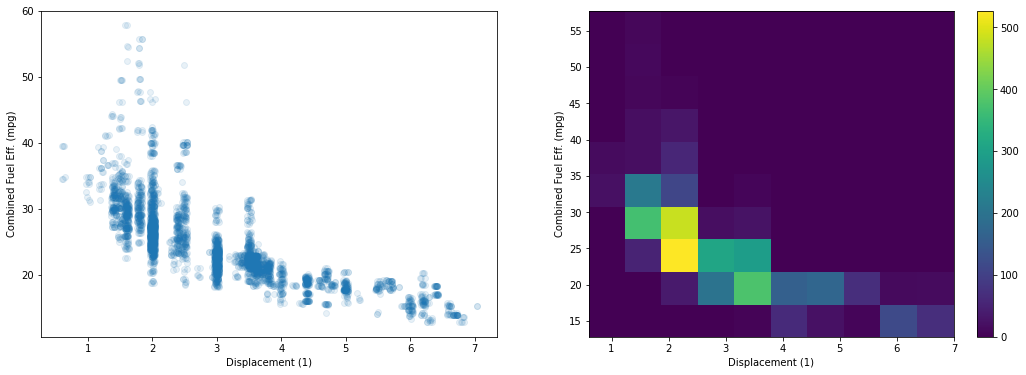

In [24]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
# In the example below, we added a colorbar() function call to add a colorbar to the side of the plot,
# showing the mapping from counts to colors.
plt.hist2d(data = df, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# hist2d  
# Heat plot - Set a minimum bound on counts and a reverse color map

- To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. 

- A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

- Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. 

- The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

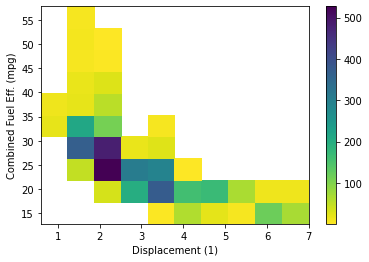

In [25]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map.
# As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow.
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

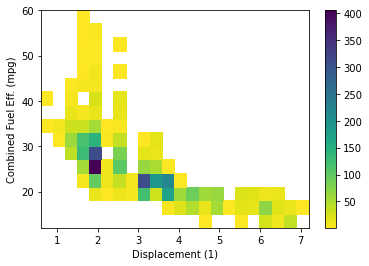

In [26]:
# Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. 
# Choosing an appropriate bin size is just as important here as it was for the univariate histogram.
# Specify bin edges 
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)


plt.hist2d(data = df, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot

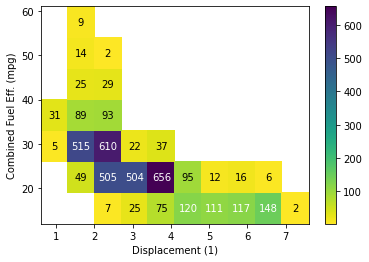

In [27]:
# Specify bin edges 
bins_x = np.arange(0.6, 7 + 0.7, 0.7)
bins_y = np.arange(12, 58 + 7, 7)

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = df, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
#Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

In [28]:
# cat_markers = [['A', 'o'],
#                ['B', 's']]

# for cat, marker in cat_markers:
#     df_cat = df[df['fuelType'] == 'Premium Gasoline']
#     plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
# plt.legend(['A','B'])

# Multivariate Visualisation

In [29]:
#
# YOUR CODE HERE
def adaptedplot_solution_1():
  
  # data setup
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
    
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    df['VClass'] = df['VClass'].astype(vclasses)
  else: # compatibility for v.20
    df['VClass'] = df['VClass'].astype('category', ordered = True, categories = sedan_classes)
  # plotting
  g = sb.FacetGrid(data = df, col = 'VClass', size = 3, col_wrap = 3)
  g.map(plt.scatter, 'city', 'highway', alpha = 1/5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


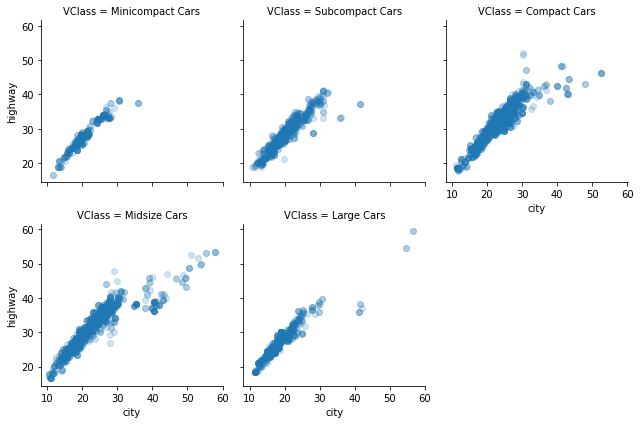

In [30]:
adaptedplot_solution_1()

In [33]:
# YOUR CODE HERE
def adaptedplot_solution_2():
  # data setup
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    df['VClass'] = df['VClass'].astype(vclasses)
  else: # compatibility for v.20
    df['VClass'] = df['VClass'].astype('category', ordered = True, categories = sedan_classes)
    fuel_econ_sub = df.loc[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
  # plotting
  sb.boxplot(data = df, x = 'VClass', y = 'displ', hue = 'fuelType')
  plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
  plt.xticks(rotation = 15)

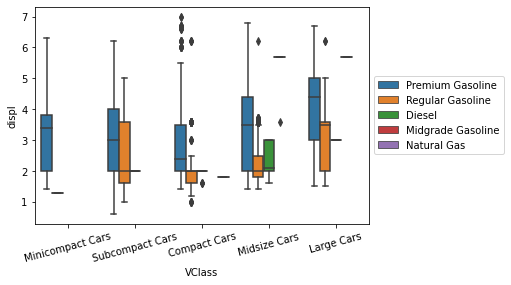

In [34]:
adaptedplot_solution_2()

# Plot Matrices
To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. 

- Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. 

- In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. 

- This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

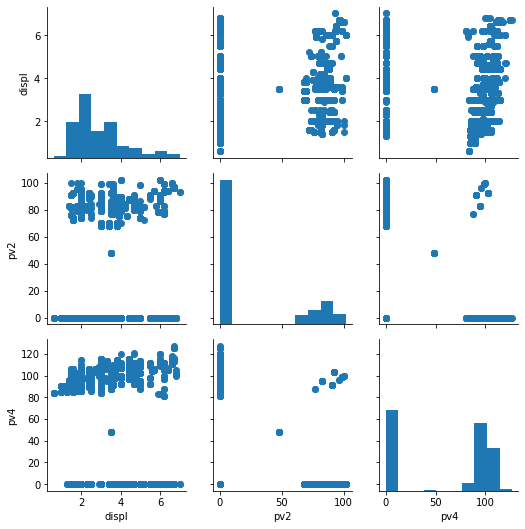

In [36]:
g = sb.PairGrid(data = df, vars = ['displ',	'pv2',	'pv4'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#The pairplot 

function can also be used to render this common use case in a single call.

For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

#### When you choose to create a plot matrix, be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. 

- Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. 

- That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete. One recommended approach is to take a random subset of the data to plot in the plot matrix instead. 

- Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

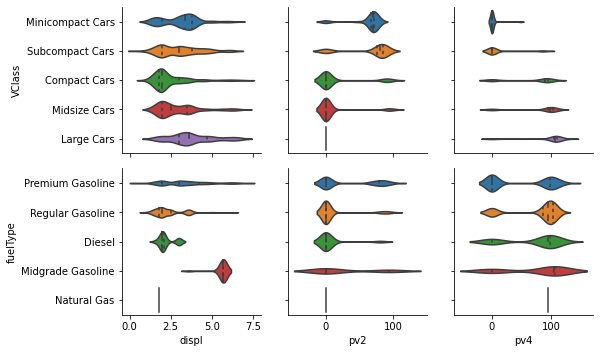

In [49]:
# 
g = sb.PairGrid(data = df, x_vars = ['displ',	'pv2',	'pv4'],
                y_vars = ['VClass', 'fuelType'])
g.map(sb.violinplot, inner = 'quartile') 	